<a href="https://colab.research.google.com/github/alexandreSafarPaim/PokeChat/blob/main/Pokechat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ChatBot para a busca de pokemons e habilidades integrando com a api aberta do PokeApi**

In [ ]:
!pip install -U -q google-generativeai
!pip install -U -q matplotlib
!pip freeze > requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 38.3 MB/s eta 0:00:00


In [ ]:
import google.generativeai as genai
import requests
import json
from PIL import Image
import matplotlib.pyplot as plt

from google.colab import userdata

GOOGLE_API_KEY=userdata.get("API_KEY")
genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
generation_config = {
  "candidate_count": 1,
  "temperature": 0,
}

model = genai.GenerativeModel(model_name='gemini-1.0-pro',
                                  generation_config=generation_config)
response_model = genai.GenerativeModel(model_name='gemini-1.0-pro',
                                  generation_config=generation_config)

In [ ]:
history=[
     {
    "role": "user",
    "parts": ['Analise as perguntas e retorne, em formato json seguindo o exemplo: \n{"type": "pokemon", "value": "bulbasaur"}\n-----\n os possiveis valores para type são: pokemon e ability, e o valor é valor esperado para o tipo pedido\n sempre traduza o valor para ingles']
  },
  {
    "role": "model",
    "parts": ['{"type": "pokemon", "value": "bulbasaur"}']
  },
  {
    "role": "user",
    "parts": ["Gostaria de saber sobre o bulbasauro"]
  },
  {
    "role": "model",
    "parts": ['{"type": "pokemon", "value": "bulbasaur"}']
  },
  {
    "role": "user",
    "parts": ["Me fale sobre o ataque stench"]
  },
  {
    "role": "model",
    "parts": ['{"type": "ability", "value": "stench"}']
  },
  {
    "role": "user",
    "parts": ["Me fale sobre o pokemon carro sedan"]
  },
  {
    "role": "model",
    "parts": ['{"type": "error", "value": "carro sedan não é um tipo de pokemon nem uma habilidade, por favor faça outra busca"}']
  },
  {
    "role": "user",
    "parts": ["pika pika"]
  },
  {
    "role": "model",
    "parts": ['{"type": "pokemon", "value": "pikachu"}']
  },
       {
    "role": "user",
    "parts": ["me fale sobre a Análise "]
  },
  {
    "role": "model",
    "parts": ['{"type": "ability", "value": "analytic"}']
  },
]

response_history=[
     {
    "role": "user",
    "parts": ["Responda em portugues todas as informações sobre o pokemon sem adicionar informações que não façam parte do texto: \n{'inicial_abilities': ['static'], 'hidden_abilities':['lightning-rod'], 'types': ['electric'], 'name': 'pikachu', 'height': 4, 'id': 25, 'weight': 60}\ninclua nome, altura, peso, tipo, aparência, habilidades, evoluções e características (mais nada)"]
  },
  {
    "role": "model",
    "parts": ['''**Pikachu**

**Tipo:** Elétrico

**Altura:** 0,4 m

**Peso:** 6,0 kg

**Aparência:**

* Pequeno roedor amarelo com orelhas pretas pontiagudas
* Bochechas vermelhas que armazenam eletricidade
* Cauda em forma de raio
* Olhos pretos e brilhantes

**Habilidades Iniciais:**

* **Estática (static)**

**Habilidades Ocultas:**

* **Absorção de Eletricidade (lightning-rod)**

**Evoluções:**

* Pichu (pré-evolução)
* Raichu (evolução)
''']
  },
     {
    "role": "user",
    "parts": ["Responda em portugues todas as informações sobre o pokemon sem adicionar informações que não façam parte do texto: \n{'inicial_abilities': ['overgrow'], 'hidden_abilities: ['chlorophyll'], 'types': ['grass', 'poison'], 'name': 'bulbasaur', 'height': 7, 'id': 1, 'weight': 69} \ninclua nome, altura, peso, tipo, aparência, habilidades, evoluções e características (mais nada)"]
  },
  {
    "role": "model",
    "parts": ['''**Bulbasauro**

**Tipo:** Planta/Venenoso

**Altura:** 0,7 m

**Peso:** 6,9 kg

**Aparência:**

* Pequeno dinossauro azul com uma grande bulbo nas costas
* O bulbo contém sementes que podem ser disparadas como projéteis
* Pele verde com manchas escuras
* Olhos grandes e castanhos

**Habilidades Iniciais:**

* **Super Crescimento (overgrow)**

**Habilidades Ocultas:**

* **Clorofila (chlorophyll)**

**Evoluções:**

* Ivysaur (evolução)
* Venusaur (evolução final)
''']
  },
  {
    "role": "user",
    "parts": ["Responda em portugues todas as informações sobre o ability sem adicionar informações que não façam parte do texto: \n{'inicial_abilities': ['trace', 'download'], 'hidden_abilities': ['analytic'], 'types': ['normal'], 'name': 'porygon', 'height': 8, 'id': 137, 'weight': 365} \ninclua nome, descrição, efeitos e Pokémon que podem ter a habilidade, (mais nada)"]
  },
  {
    "role": "model",
    "parts": ['''**Análise (analytic)**

**Descrição:**

A habilidade Análise permite que o Pokémon analise o Pokémon adversário e descubra qual de suas estatísticas é a mais alta.

**Efeitos:**

* No início da batalha, o Pokémon com a habilidade Análise identifica a estatística mais alta do Pokémon adversário (Ataque, Defesa, Ataque Especial, Defesa Especial ou Velocidade).
* Essa informação é exibida ao jogador como uma mensagem de texto.

**Pokémon que podem ter a habilidade Análise:**

* Porygon
* Porygon2
* Porygon-Z
* Rotom
* Rotom-Heat
* Rotom-Wash
* Rotom-Frost
* Rotom-Fan
* Rotom-Mow
''']
  },
]


analitic_chat = model.start_chat(history=history)
response_chat = response_model.start_chat(history=response_history)

In [ ]:
def analisePromp(prompt):
  response = analitic_chat.send_message(prompt)
  search = response.text
  search = json.loads(search)
  return search

In [ ]:
def cleanPokemonResponse(response):
  return {
    "inicial_abilities": [ability['ability']['name'] for ability in response["abilities"] if ability['is_hidden'] == False],
    "hidden_abilities": [ability['ability']['name'] for ability in response["abilities"] if ability['is_hidden'] == True],
    "image": response["sprites"]["other"]["official-artwork"]["front_default"],
    "types": [poke_type['type']['name'] for poke_type in response["types"]],
    "name": response["name"],
    "height":  response["height"],
    "id":  response["id"],
    "weight":  response["weight"],
  }

In [ ]:
def cleanAbilitiesnResponse(response):
  return {
    "effect_changes": [effect_c['effect'] for effect_c in response["effect_changes"][0]["effect_entries"] if effect_c["language"]["name"] == "en"] if len(response["effect_changes"]) > 0 else [],
    "effect_entries": [effect_e['short_effect'] for effect_e in response["effect_entries"] if effect_e["language"]["name"] == "en"],
    "pokemons": [pokemon['pokemon']['name'] for pokemon in response["pokemon"]],
    "name": response["name"],
    "id":  response["id"],
    "imge": None,
  }

In [ ]:
def getResponsePokeApi(search):
  url = f"https://pokeapi.co/api/v2/{search['type']}/{search['value']}"
  response = requests.get(url)
  api_response = response.json()

  try:
    if search['type'] == "pokemon":
        api_response = cleanPokemonResponse(api_response)
    else:
      api_response = cleanAbilitiesnResponse(api_response)
  except:
    search['about'] = 'pokemon universe'
    return search

  return api_response

In [ ]:
def finalResponseChat(api_response, search):
  response_prompt = f'Responda em portugues todas as informações sobre o {search["type"]} sem adicionar informações que não façam parte do texto: \n{api_response}'
  final_response = response_chat.send_message(prompt)
  print("\n\nResposta:\n", final_response.text, '\n\n')
  if api_response['image']:
    im = Image.open(requests.get(api_response['image'], stream = True).raw)
    plt.imshow(im)
    plt.axis('off')
    plt.show()
    print("\n")

Pesquise sobre um pokemon ou habilidade: pikachu


Resposta:
 **Pikachu**

**Tipo:** Elétrico

**Altura:** 0,4 m

**Peso:** 6,0 kg

**Aparência:**

* Pequeno roedor amarelo com orelhas pretas pontiagudas
* Bochechas vermelhas que armazenam eletricidade
* Cauda em forma de raio
* Olhos pretos e brilhantes

**Habilidades Iniciais:**

* Estática (static)

**Habilidades Ocultas:**

* Absorção de Eletricidade (lightning-rod)

**Evoluções:**

* Pichu (pré-evolução)
* Raichu (evolução)

**Características:**

* Conhecido por sua velocidade e agilidade
* Pode gerar e armazenar eletricidade em suas bochechas
* Usa eletricidade para se comunicar com outros Pikachu
* É um Pokémon muito popular e reconhecível 




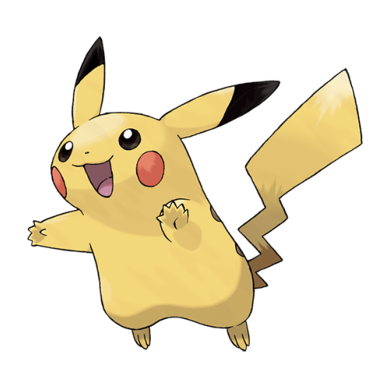

None
Pesquise sobre um pokemon ou habilidade: fim


In [ ]:
prompt = input('Pesquise sobre um pokemon ou habilidade: ')

while prompt != "fim":
  analise_json = analisePromp(prompt)
  if analise_json['type'] == "error":
    print(analise_json['value'])
  else:
    # print(analise_json)
    api_response = getResponsePokeApi(analise_json)
    # print(api_response)
    finalResponseChat(api_response,analise_json)
  prompt = input('Pesquise sobre um pokemon ou habilidade: ')